In [1]:
import glob
import numpy as np
import pandas as pd
import seaborn as sn
import scikitplot as skplt
import matplotlib.pyplot as plt

from itertools import combinations
from IPython.display import display
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use(["seaborn-poster"])

RD = lambda x: np.round(x, 4)

In [2]:
def compute_user_accuracy(data, indices, save_confusion_matrix = None, verbose = False):
    labels      = []
    predictions = []
    RD   = lambda x: np.round(x, 3)
    names  = [data.columns.tolist()[idx] for idx in indices]
    for user_id, group in data.groupby("User"):
        copy  = group.drop(["User", "Label"], axis = 1, inplace = False)
        copy  = group[names]
        
        preds = []
        for row in copy.values:
            values, counts = np.unique(row, return_counts = True)
            pred = values[np.argmax(counts)]
            preds.append(pred)
        
        values, counts = np.unique(preds, return_counts = True)
        preds = values[np.argmax(counts)]
        label = group['Label'].values[0]
        
#         values, counts = np.unique(copy.values, return_counts = True)
#         preds = values[np.argmax(counts)]
#         label = group['Label'].values[0]

        predictions.append(preds)
        labels.append(label)
    
    predictions = np.array(predictions)
    labels      = np.array(labels)
    
    if save_confusion_matrix != None:
        skplt.metrics.plot_confusion_matrix(labels,  predictions, figsize = (13, 13))
        plt.savefig(save_confusion_matrix)
        plt.show()
    
    tp = sum(predictions == labels)
    fp = sum(predictions  < labels)
    fn = sum(predictions  > labels)
    oe = sum((predictions - labels) > 1)
    
    accuracy  = RD(tp / predictions.shape[0])
    ord_error = RD(oe / predictions.shape[0])
    precision = RD(tp / (tp + fp))
    recall    = RD(tp / (tp + fn))
    
    if verbose:
        print(f"Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, Ordinal Error: {ord_error}")
        
    return accuracy_score(predictions, labels)

# Post Level - Results Analysis

In [3]:
preds = [file for file in sorted(glob.glob("../predictions/post-level/post_results_model_oof_*.csv"))]

In [4]:
data = pd.DataFrame()

for idx, path in enumerate(preds):
    results = pd.read_csv(path)
    
    if idx == 0: 
        data['User']  = results['User']
        data['Label'] = results['Label']
        
    name = preds[idx].split("_")[-1].split(".")[0]
    data[f'Model_{name}'] = results['Predictions']

In [5]:
display(data)

,User,Label,Model_225,Model_274,Model_281,Model_293,Model_346,Model_353
0,306.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,489.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0
2,131.0,4.0,3.0,5.0,1.0,3.0,3.0,3.0
3,148.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
4,238.0,5.0,5.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...
9030,150.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
9031,328.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9032,282.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0
9033,135.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0


In [6]:
display(data.corr())

,User,Label,Model_225,Model_274,Model_281,Model_293,Model_346,Model_353
User,1.000000,-0.228951,-0.012126,-0.022743,-0.000476,-0.003516,-0.013177,-0.008100
Label,-0.228951,1.000000,0.224932,0.227162,0.189827,0.151979,0.156706,0.163253
Model_225,-0.012126,0.224932,1.000000,0.462323,0.410326,0.348627,0.378095,0.340804
Model_274,-0.022743,0.227162,0.462323,1.000000,0.446333,0.424933,0.407495,0.414542
Model_281,-0.000476,0.189827,0.410326,0.446333,1.000000,0.533239,0.727653,0.488479
Model_293,-0.003516,0.151979,0.348627,0.424933,0.533239,1.000000,0.524219,0.557345
Model_346,-0.013177,0.156706,0.378095,0.407495,0.727653,0.524219,1.000000,0.470395
Model_353,-0.008100,0.163253,0.340804,0.414542,0.488479,0.557345,0.470395,1.000000


In [7]:
for column in data.columns.tolist():
    if column == "User" or column == "Label":
        continue
        
    print(f"Model {column}, Individual Post Accuracy: {RD(accuracy_score(data['Label'], data[column]))}")

Model Model_225, Individual Post Accuracy: 0.3045
Model Model_274, Individual Post Accuracy: 0.2897
Model Model_281, Individual Post Accuracy: 0.2999
Model Model_293, Individual Post Accuracy: 0.3042
Model Model_346, Individual Post Accuracy: 0.3043
Model Model_353, Individual Post Accuracy: 0.3054


In [8]:
models = [2, 3, 4, 5, 6, 7]
 
for group in range(1, len(models) + 1):
    for subset in combinations(models, group):
        print(f"Accuracy: {np.round(compute_user_accuracy(data, list(subset)), 3)}, Models: {list(subset)}") 

Accuracy: 0.388, Models: [2]
Accuracy: 0.388, Models: [3]
Accuracy: 0.394, Models: [4]
Accuracy: 0.401, Models: [5]
Accuracy: 0.388, Models: [6]
Accuracy: 0.394, Models: [7]
Accuracy: 0.385, Models: [2, 3]
Accuracy: 0.378, Models: [2, 4]
Accuracy: 0.413, Models: [2, 5]
Accuracy: 0.388, Models: [2, 6]
Accuracy: 0.404, Models: [2, 7]
Accuracy: 0.397, Models: [3, 4]
Accuracy: 0.424, Models: [3, 5]
Accuracy: 0.399, Models: [3, 6]
Accuracy: 0.411, Models: [3, 7]
Accuracy: 0.394, Models: [4, 5]
Accuracy: 0.378, Models: [4, 6]
Accuracy: 0.392, Models: [4, 7]
Accuracy: 0.394, Models: [5, 6]
Accuracy: 0.383, Models: [5, 7]
Accuracy: 0.385, Models: [6, 7]
Accuracy: 0.388, Models: [2, 3, 4]
Accuracy: 0.383, Models: [2, 3, 5]
Accuracy: 0.385, Models: [2, 3, 6]
Accuracy: 0.392, Models: [2, 3, 7]
Accuracy: 0.39, Models: [2, 4, 5]
Accuracy: 0.367, Models: [2, 4, 6]
Accuracy: 0.372, Models: [2, 4, 7]
Accuracy: 0.392, Models: [2, 5, 6]
Accuracy: 0.39, Models: [2, 5, 7]
Accuracy: 0.367, Models: [2, 6, 7

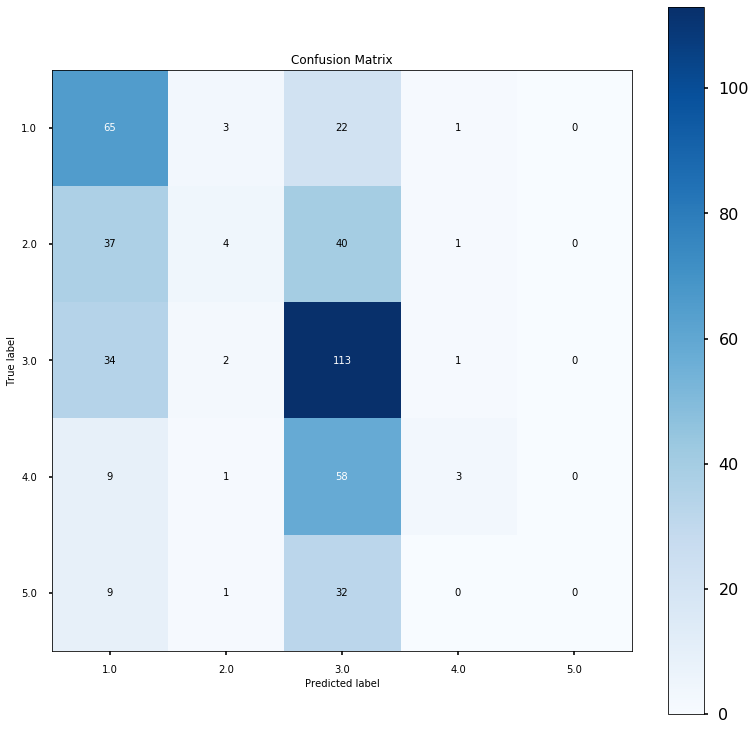

Accuracy: 0.424, Precision: 0.503, Recall: 0.731, Ordinal Error: 0.055


0.4243119266055046

In [9]:
compute_user_accuracy(data, [3, 5], save_confusion_matrix = "../images/post_best_first.png", verbose = True)

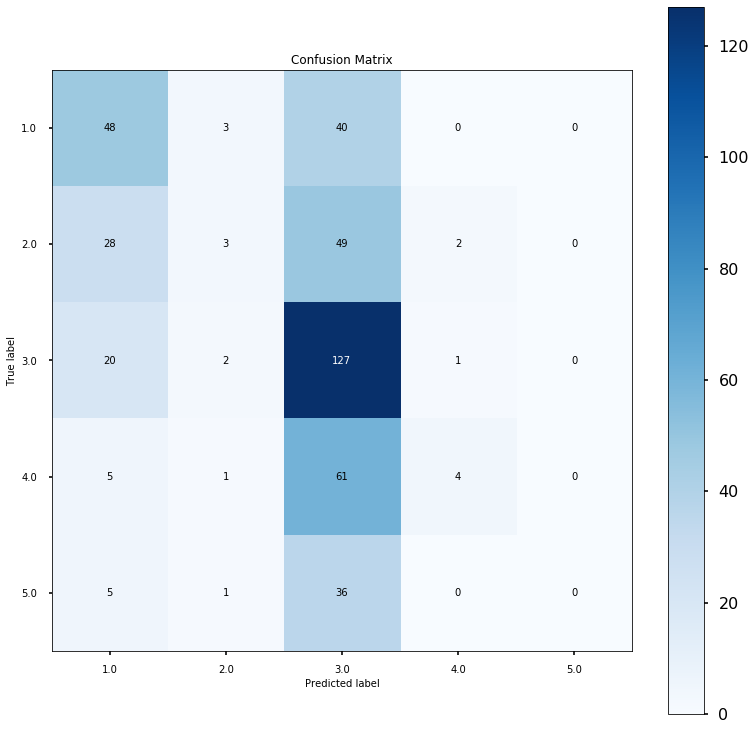

Accuracy: 0.417, Precision: 0.534, Recall: 0.657, Ordinal Error: 0.096


0.41743119266055045

In [10]:
compute_user_accuracy(data, [3, 4, 5], save_confusion_matrix = "../images/post_best_second.png", verbose = True)

# User Level - Results Analysis

In [11]:
preds = [file for file in sorted(glob.glob("../predictions/user-level/user_results_model_oof_*.csv"))]

In [12]:
data = pd.DataFrame()

for idx, path in enumerate(preds):
    results = pd.read_csv(path)
    
    if idx == 0: 
        data['User']  = results['User']
        data['Label'] = results['Label']
        
    name = preds[idx].split("_")[-1].split(".")[0]
    data[f'Model_{name}'] = results['Predictions']

In [13]:
display(data)

,User,Label,Model_100,Model_13,Model_176,Model_290,Model_31,Model_326,Model_330
0,5.0,1.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0
1,19.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,24.0,5.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
3,26.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,33.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...
431,477.0,1.0,1.0,2.0,1.0,1.0,3.0,1.0,2.0
432,483.0,2.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0
433,484.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
434,488.0,3.0,2.0,4.0,3.0,3.0,3.0,3.0,3.0


In [14]:
models = [2, 3, 4, 5, 6, 7, 8]
 
for group in range(1, len(models) + 1):
    for subset in combinations(models, group):
        print(f"Accuracy: {np.round(compute_user_accuracy(data, list(subset)), 3)}, Models: {list(subset)}") 

Accuracy: 0.385, Models: [2]
Accuracy: 0.399, Models: [3]
Accuracy: 0.424, Models: [4]
Accuracy: 0.431, Models: [5]
Accuracy: 0.427, Models: [6]
Accuracy: 0.431, Models: [7]
Accuracy: 0.431, Models: [8]
Accuracy: 0.406, Models: [2, 3]
Accuracy: 0.415, Models: [2, 4]
Accuracy: 0.408, Models: [2, 5]
Accuracy: 0.404, Models: [2, 6]
Accuracy: 0.406, Models: [2, 7]
Accuracy: 0.406, Models: [2, 8]
Accuracy: 0.404, Models: [3, 4]
Accuracy: 0.399, Models: [3, 5]
Accuracy: 0.406, Models: [3, 6]
Accuracy: 0.415, Models: [3, 7]
Accuracy: 0.401, Models: [3, 8]
Accuracy: 0.436, Models: [4, 5]
Accuracy: 0.436, Models: [4, 6]
Accuracy: 0.438, Models: [4, 7]
Accuracy: 0.429, Models: [4, 8]
Accuracy: 0.443, Models: [5, 6]
Accuracy: 0.45, Models: [5, 7]
Accuracy: 0.436, Models: [5, 8]
Accuracy: 0.44, Models: [6, 7]
Accuracy: 0.436, Models: [6, 8]
Accuracy: 0.447, Models: [7, 8]
Accuracy: 0.436, Models: [2, 3, 4]
Accuracy: 0.431, Models: [2, 3, 5]
Accuracy: 0.429, Models: [2, 3, 6]
Accuracy: 0.438, Model

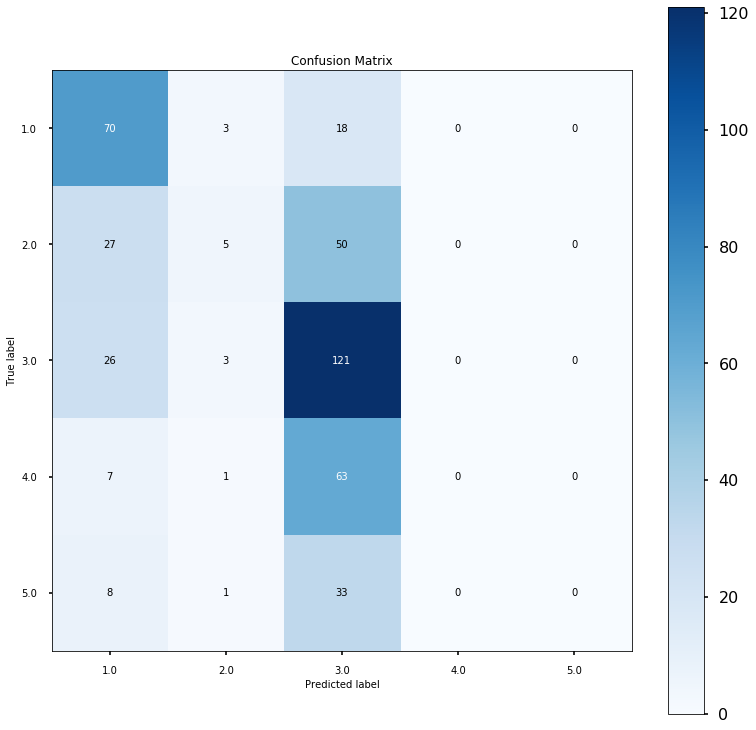

Accuracy: 0.45, Precision: 0.537, Recall: 0.734, Ordinal Error: 0.041


0.44954128440366975

In [15]:
compute_user_accuracy(data, [5, 7], save_confusion_matrix = "../images/user_best_first.png", verbose = True)

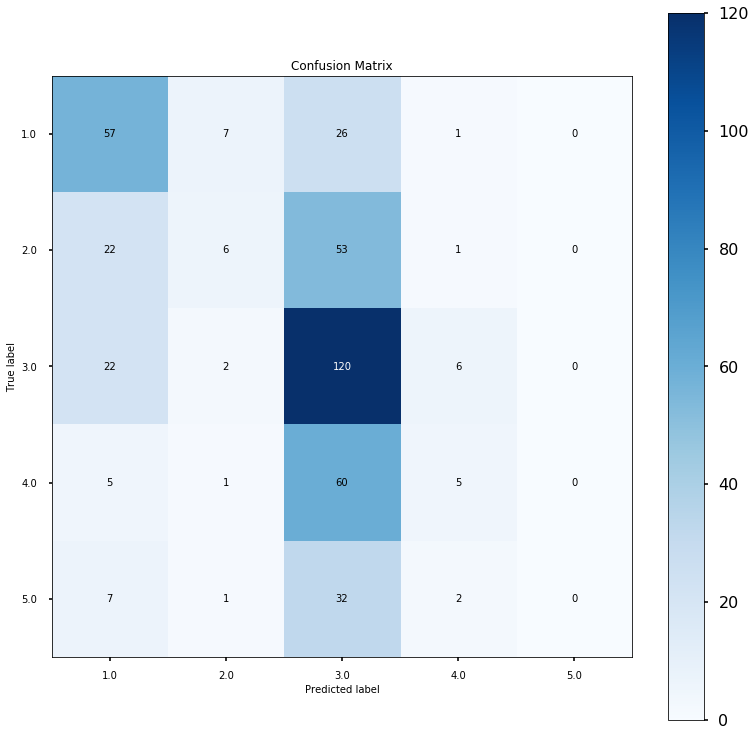

Accuracy: 0.431, Precision: 0.55, Recall: 0.667, Ordinal Error: 0.064


0.43119266055045874

In [16]:
compute_user_accuracy(data, [7], save_confusion_matrix = "../images/user_best_precision.png", verbose = True)